# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import key_dict
owm_key = key_dict["owm"]

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# build url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={owm_key}&units={units}&q="

In [4]:
# set up lists to retrieve response info
name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

In [6]:
city_num = 0

# create loop for all cities in sample
for city in cities:
    # call API
    response = requests.get(query_url + city).json()
    # try to get data
    try:
        # append data to lists
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
    
        # print log
        print(f"Processing Record {city_num} | {city}")
        # increase city_num
        city_num += 1
        
    # make exception for cities not found
    except KeyError:
        print("City not found. Skipping...")
        
# end loop and print message to indicate completion
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
    

Processing Record 0 | magadan
Processing Record 1 | seynod
Processing Record 2 | north bend
Processing Record 3 | matagami
Processing Record 4 | rikitea
Processing Record 5 | khatanga
Processing Record 6 | dawlatabad
Processing Record 7 | barrow
Processing Record 8 | bubaque
Processing Record 9 | qaanaaq
Processing Record 10 | san cristobal
Processing Record 11 | vanavara
Processing Record 12 | acapulco
Processing Record 13 | new norfolk
Processing Record 14 | nanortalik
Processing Record 15 | vaini
City not found. Skipping...
Processing Record 16 | bluff
Processing Record 17 | saint-philippe
Processing Record 18 | gotsu
Processing Record 19 | jamestown
Processing Record 20 | paris
Processing Record 21 | port alfred
Processing Record 22 | cape town
Processing Record 23 | souillac
Processing Record 24 | aasiaat
Processing Record 25 | dikson
Processing Record 26 | parauna
Processing Record 27 | taoudenni
Processing Record 28 | nizwa
Processing Record 29 | chokurdakh
Processing Record 30 

Processing Record 226 | aguimes
Processing Record 227 | biak
Processing Record 228 | deputatskiy
Processing Record 229 | garavuti
Processing Record 230 | nago
Processing Record 231 | isla mujeres
Processing Record 232 | solnechnyy
Processing Record 233 | aswan
Processing Record 234 | rio grande
Processing Record 235 | saint pete beach
Processing Record 236 | sitka
Processing Record 237 | vostok
Processing Record 238 | dhidhdhoo
Processing Record 239 | jaguey grande
Processing Record 240 | ola
Processing Record 241 | alugan
Processing Record 242 | rawson
Processing Record 243 | matola
Processing Record 244 | tortoli
Processing Record 245 | clyde river
Processing Record 246 | ostrovnoy
Processing Record 247 | sao filipe
Processing Record 248 | bathsheba
Processing Record 249 | fereydun kenar
Processing Record 250 | gumdag
City not found. Skipping...
Processing Record 251 | kaa-khem
Processing Record 252 | namtsy
Processing Record 253 | kumluca
Processing Record 254 | pacifica
Processing 

Processing Record 461 | clarence town
Processing Record 462 | manitouwadge
Processing Record 463 | marrakesh
Processing Record 464 | kasamwa
Processing Record 465 | kruisfontein
Processing Record 466 | zyryanka
Processing Record 467 | iranshahr
Processing Record 468 | cordoba
Processing Record 469 | rudbar
Processing Record 470 | buala
Processing Record 471 | genhe
Processing Record 472 | emerald
Processing Record 473 | cam ranh
Processing Record 474 | lavrentiya
Processing Record 475 | berlevag
Processing Record 476 | kimbe
Processing Record 477 | saint-joseph
Processing Record 478 | palaikastron
Processing Record 479 | havoysund
Processing Record 480 | huangchuan
Processing Record 481 | worthington
Processing Record 482 | lashio
Processing Record 483 | ust-ishim
Processing Record 484 | santa maria
Processing Record 485 | lidkoping
City not found. Skipping...
Processing Record 486 | juneau
Processing Record 487 | bichena
Processing Record 488 | arlit
Processing Record 489 | tolaga bay

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create data frame from lists data collected
raw_weather_data = pd.DataFrame({
    'Name':name,
    'Lat':lat,
    'Lng':lng,
    'Max Temp':max_temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date':date
})
raw_weather_data

,Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Magadan,59.5667,150.8000,-12.22,86,86,1.96,RU,1616301512
1,Seynod,45.8855,6.0883,1.00,69,0,2.57,FR,1616301523
2,North Bend,43.4065,-124.2243,8.00,81,75,2.57,US,1616301524
3,Matagami,49.7502,-77.6328,4.00,35,1,3.60,CA,1616301524
4,Rikitea,-23.1203,-134.9692,26.55,74,87,3.10,PF,1616301525
...,...,...,...,...,...,...,...,...,...
580,Concarneau,47.8750,-3.9225,8.00,87,90,1.54,FR,1616302043
581,Northam,51.0333,-4.2167,8.89,92,72,2.24,GB,1616302043
582,Yarmouth,41.7057,-70.2286,3.00,80,1,3.09,US,1616302044
583,Hualmay,-11.0964,-77.6139,21.48,78,99,3.39,PE,1616302044


In [9]:
# summary table
raw_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,585.000000,585.00000,585.000000,585.000000,585.00000,585.000000,5.850000e+02
mean,20.980160,17.42007,11.795419,73.276923,52.28547,3.756137,1.616302e+09
std,33.844014,91.54022,15.100522,20.921622,39.07784,2.623892,1.287309e+02
min,-54.800000,-175.20000,-33.530000,1.000000,0.00000,0.110000,1.616301e+09
25%,-7.259700,-60.70000,2.000000,65.000000,5.00000,1.790000,1.616302e+09
50%,27.202500,21.25610,15.120000,78.000000,62.00000,3.090000,1.616302e+09
75%,49.121500,98.30000,24.000000,89.000000,90.00000,5.140000,1.616302e+09
max,78.218600,179.31670,36.670000,100.000000,100.00000,19.030000,1.616302e+09


In [10]:
# export to csv file
raw_weather_data.to_csv('cities.csv', header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

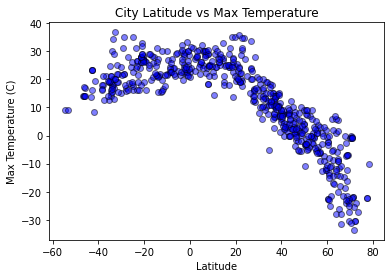

<Figure size 432x288 with 0 Axes>

In [16]:
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.show()
plt.savefig("LatVsTemp.png")

## Latitude vs. Humidity Plot

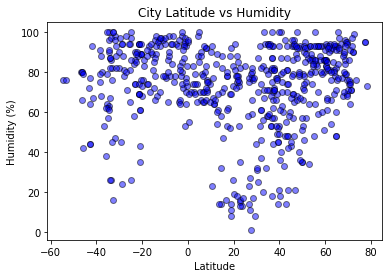

<Figure size 432x288 with 0 Axes>

In [17]:
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.show()
plt.savefig("LatVsHumidity.png")

## Latitude vs. Cloudiness Plot

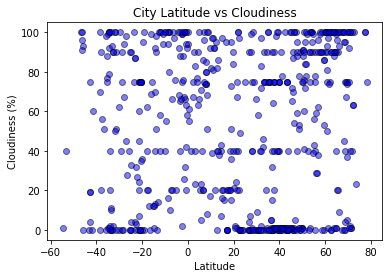

<Figure size 432x288 with 0 Axes>

In [18]:
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.show()
plt.savefig("LatVsCloudiness.png")

## Latitude vs. Wind Speed Plot

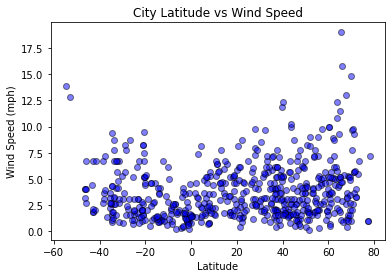

<Figure size 432x288 with 0 Axes>

In [19]:
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.show()
plt.savefig("LatVsWindSpeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression